# 🛍️ Brazilian E-Commerce by Olist - Complete Data Analysis and Machine learning Project

This project aims to perform a complete **Exploratory Data Analysis (EDA)** on the Brazilian E-Commerce dataset from Olist to understand key factors that influence order delivery times, customer behavior, and business performance.  
The analysis is conducted step-by-step, and it covers both statistical insights and business-driven conclusions.

---

## 📌 Project Objectives

In this project, we will:

- Inspect and understand multiple dataset structures
- Clean missing, wrong, and unrealistic values
- Create new meaningful features using Feature Engineering
- Perform:
  - Univariate Analysis
  - Bivariate Analysis
  - Multivariate Analysis
- Merge all datasets into a master dataset
- Extract clear and actionable **Final Business Insights**

---

## 🎯 Project Goal

The main goal of this project is to:
- Analyze the Brazilian e-commerce market behavior
- Identify the most important factors that affect delivery times
- Support better business decisions using data-driven insights
- Prepare data for machine learning models

## 1️⃣ Importing Required Libraries 📥

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2️⃣ Loading the Datasets 🛢️

In [2]:
df_customer = pd.read_csv(r'C:\Users\moham\Desktop\Data Mining\Project\Datasets\olist_customers_dataset.csv')
df_location = pd.read_csv(r'C:\Users\moham\Desktop\Data Mining\Project\Datasets\olist_geolocation_dataset.csv')
df_order_items = pd.read_csv(r'C:\Users\moham\Desktop\Data Mining\Project\Datasets\olist_order_items_dataset.csv')
df_order_payment = pd.read_csv(r'C:\Users\moham\Desktop\Data Mining\Project\Datasets\olist_order_payments_dataset.csv')
df_order_review = pd.read_csv(r'C:\Users\moham\Desktop\Data Mining\Project\Datasets\olist_order_reviews_dataset.csv')
df_orders = pd.read_csv(r'C:\Users\moham\Desktop\Data Mining\Project\Datasets\olist_orders_dataset.csv')
df_products = pd.read_csv(r'C:\Users\moham\Desktop\Data Mining\Project\Datasets\olist_products_dataset.csv')
df_translation = pd.read_csv(r'C:\Users\moham\Desktop\Data Mining\Project\Datasets\product_category_name_translation.csv')
df_sellers = pd.read_csv(r'C:\Users\moham\Desktop\Data Mining\Project\Datasets\olist_sellers_dataset.csv')

#### Customer Dataset

In [3]:
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_customer.shape

(99441, 5)

#### Locations Dataset

In [5]:
df_location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
df_location.shape

(1000163, 5)

#### Order Items Dataset

In [7]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
df_order_items.shape

(112650, 7)

#### Order payment Dataset

In [9]:
df_order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
df_order_payment.shape

(103886, 5)

#### Order review Dataset

In [11]:
df_order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
df_order_review.shape

(99224, 7)

#### Orders Dataset

In [13]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
df_orders.shape

(99441, 8)

#### Products

In [15]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
df_products.shape

(32951, 9)

#### Categories Translation 

In [17]:
df_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [18]:
df_translation.shape

(71, 2)

#### Sallers Dataset

In [19]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [20]:
df_sellers.shape

(3095, 4)

## 3️⃣ Exploratory Data Analysis (EDA) 📊

### 3.1 Customer Dataset

#### Information

In [21]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Check missing values

In [22]:
df_customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### Check Duplication

In [23]:
df_customer.duplicated().sum()

np.int64(0)

#### Check Columns

In [24]:
df_customer.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

#### Unique Customers

In [25]:
df_customer['customer_unique_id'].value_counts()

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
1c137fe37df712015f6488edafe8ece4     1
5a1680640123fc80e801301a2fb57395     1
046470763123d3d6364f89095b4e47ab     1
aaf22868003377e859049dcf5f0b3fdf     1
206e64e8af2633a2ebe158a7fcb860db     1
Name: count, Length: 96096, dtype: int64

#### Customer states

In [26]:
df_customer['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

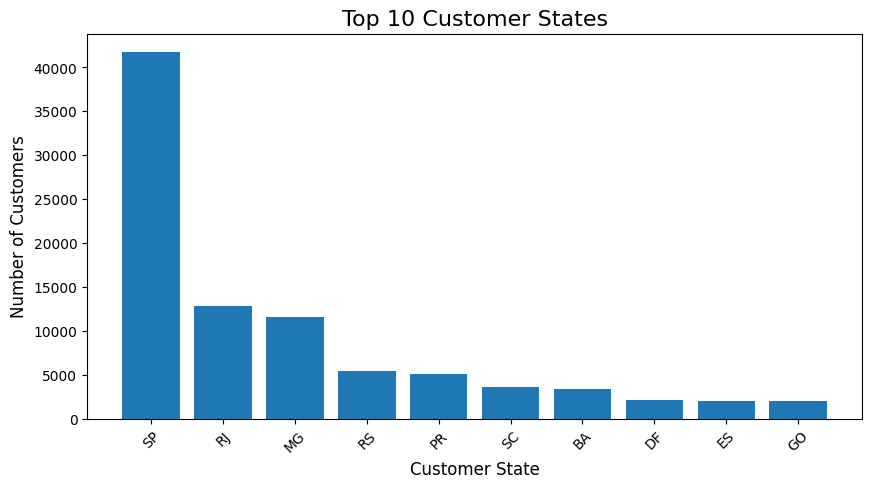

In [27]:
top_10 = df_customer['customer_state'].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.bar(top_10.index, top_10.values) 
plt.title("Top 10 Customer States", fontsize=16)        
plt.xlabel("Customer State", fontsize=12)             
plt.ylabel("Number of Customers", fontsize=12)     
plt.xticks(rotation=45)                              
plt.show()

#### Customer cities

In [28]:
df_customer['customer_city'].value_counts().head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sao paulo'),
  Text(1, 0, 'rio de janeiro'),
  Text(2, 0, 'belo horizonte'),
  Text(3, 0, 'brasilia'),
  Text(4, 0, 'curitiba'),
  Text(5, 0, 'campinas'),
  Text(6, 0, 'porto alegre'),
  Text(7, 0, 'salvador'),
  Text(8, 0, 'guarulhos'),
  Text(9, 0, 'sao bernardo do campo')])

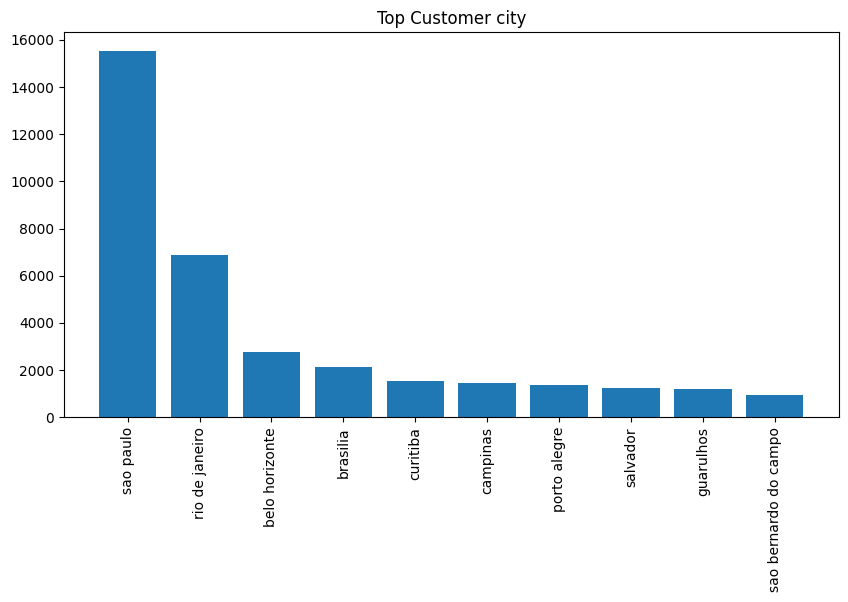

In [29]:
plt.figure(figsize=(10,5))
plt.bar(df_customer['customer_city'].value_counts().head(10).index ,
    height=df_customer['customer_city'].value_counts().head(10).values)
plt.title('Top Customer city')
plt.xticks(rotation=90)

In [30]:
df_customer[['customer_city', 'customer_state']].head()


,customer_city,customer_state
0,franca,SP
1,sao bernardo do campo,SP
2,sao paulo,SP
3,mogi das cruzes,SP
4,campinas,SP


#### ✅ Customer Dataset Summary

- **Total Customers**: 99,441 unique customers
- **No Missing Values**: All columns are complete
- **No Duplicates**: Dataset is clean
- **Geographic Distribution**: Most customers from SP, RJ, MG states
- **Data Quality**: ✅ Ready for analysis

### 3.2 Location Dataset

#### Information

In [31]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### 3.3 Order items dataset

#### Information

In [32]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Describtion

In [33]:
df_order_items.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


In [34]:
df_order_items.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,112650.0,NaN,NaN,NaN,1.197834,0.705124,1.0,1.0,1.0,1.0,21.0
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,112650.0,NaN,NaN,NaN,120.653739,183.633928,0.85,39.9,74.99,134.9,6735.0
freight_value,112650.0,NaN,NaN,NaN,19.99032,15.806405,0.0,13.08,16.26,21.15,409.68


#### Fix column time

In [35]:
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])

#### Numeric columns 

In [36]:
num_col = df_order_items.select_dtypes(['float64'])
num_col

,price,freight_value
0,58.90,13.29
1,239.90,19.93
2,199.00,17.87
3,12.99,12.79
4,199.90,18.14
...,...,...
112645,299.99,43.41
112646,350.00,36.53
112647,99.90,16.95
112648,55.99,8.72


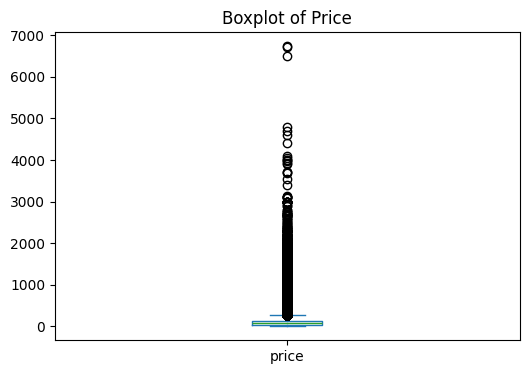

In [37]:
plt.figure(figsize=(6,4))
df_order_items['price'].plot(kind='box')
plt.title('Boxplot of Price')
plt.show()

#### Top products

In [38]:
df_summary = df_order_items.groupby('product_id').agg(
    sales_count=('order_id', 'count'),
    revenue=('price', 'sum')
).sort_values(by='revenue', ascending=False)

df_summary.head(20)

,sales_count,revenue
product_id,,
bb50f2e236e5eea0100680137654686c,195,63885.00
6cdd53843498f92890544667809f1595,156,54730.20
d6160fb7873f184099d9bc95e30376af,35,48899.34
d1c427060a0f73f6b889a5c7c61f2ac4,343,47214.51
99a4788cb24856965c36a24e339b6058,488,43025.56
3dd2a17168ec895c781a9191c1e95ad7,274,41082.60
25c38557cf793876c5abdd5931f922db,38,38907.32
5f504b3a1c75b73d6151be81eb05bdc9,63,37733.90
53b36df67ebb7c41585e8d54d6772e08,323,37683.42


#### Pareto (80/20)

In [39]:
df_summary['cum_revenue'] = df_summary['revenue'].cumsum()
total = df_summary['revenue'].sum()
df_summary['cum_revenue_pct'] = df_summary['cum_revenue'] / total

df_summary = df_summary.reset_index(drop=True)
df_summary['product_rank_pct'] = (df_summary.index + 1) / len(df_summary)

top_20pct = df_summary[df_summary['product_rank_pct'] <= 0.20]

top_20pct['revenue'].sum() / total

np.float64(0.748312703341392)

In [40]:
df_summary.head(10)


,sales_count,revenue,cum_revenue,cum_revenue_pct,product_rank_pct
0,195,63885.00,63885.00,0.004700,0.000030
1,156,54730.20,118615.20,0.008727,0.000061
2,35,48899.34,167514.54,0.012325,0.000091
3,343,47214.51,214729.05,0.015799,0.000121
4,488,43025.56,257754.61,0.018964,0.000152
5,274,41082.60,298837.21,0.021987,0.000182
6,38,38907.32,337744.53,0.024849,0.000212
7,63,37733.90,375478.43,0.027626,0.000243
8,323,37683.42,413161.85,0.030398,0.000273
9,527,37608.90,450770.75,0.033165,0.000303


#### Seller Analysis

In [41]:
df_summary = df_order_items.groupby('seller_id').agg(
    sales_count=('order_id', 'count'),
    revenue=('price', 'sum')
).sort_values(by='revenue', ascending=False)

In [42]:
df_summary.head(10)

,sales_count,revenue
seller_id,,
4869f7a5dfa277a7dca6462dcf3b52b2,1156,229472.63
53243585a1d6dc2643021fd1853d8905,410,222776.05
4a3ca9315b744ce9f8e9374361493884,1987,200472.92
fa1c13f2614d7b5c4749cbc52fecda94,586,194042.03
7c67e1448b00f6e969d365cea6b010ab,1364,187923.89
7e93a43ef30c4f03f38b393420bc753a,340,176431.87
da8622b14eb17ae2831f4ac5b9dab84a,1551,160236.57
7a67c85e85bb2ce8582c35f2203ad736,1171,141745.53
1025f0e2d44d7041d6cf58b6550e0bfa,1428,138968.55


#### Price vs. Freight value

In [43]:
df_order_items['freight_ratio'] = df_order_items['freight_value'] / df_order_items['price']

Text(0, 0.5, 'freight value')

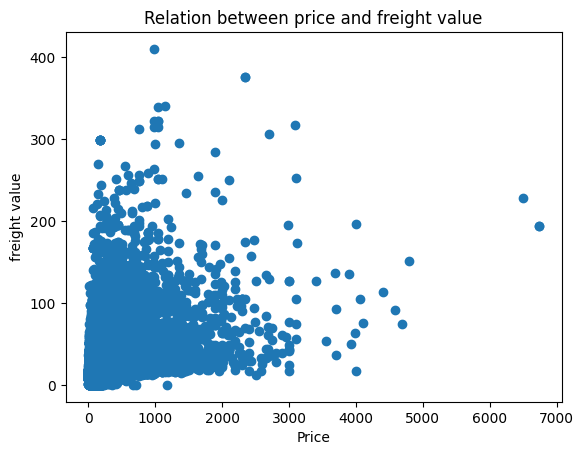

In [44]:
plt.title('Relation between price and freight value')
plt.scatter(
    x= df_order_items['price'],
    y=  df_order_items['freight_value']
)
plt.xlabel('Price')
plt.ylabel('freight value')

(0.0, 100.0)

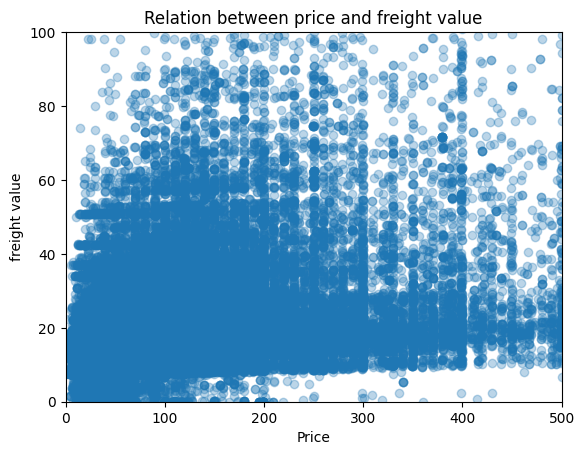

In [45]:
plt.title('Relation between price and freight value')
plt.scatter(
    x= df_order_items['price'],
    y=  df_order_items['freight_value'],
    alpha=0.3
)
plt.xlabel('Price')
plt.ylabel('freight value')
plt.xlim(0, 500) 
plt.ylim(0, 100)

#### Basket Size

In [46]:
basket_size = df_order_items.groupby('order_id').size()  
mean_basket_size = basket_size.mean()
median_basket_size = basket_size.median()
max_basket_size = basket_size.max()

print(f"Mean basket size: {mean_basket_size: .2f}")
print(f"Medium: {median_basket_size}")
print(f"Maximum basket size: {max_basket_size}")


Mean basket size:  1.14
Medium: 1.0
Maximum basket size: 21


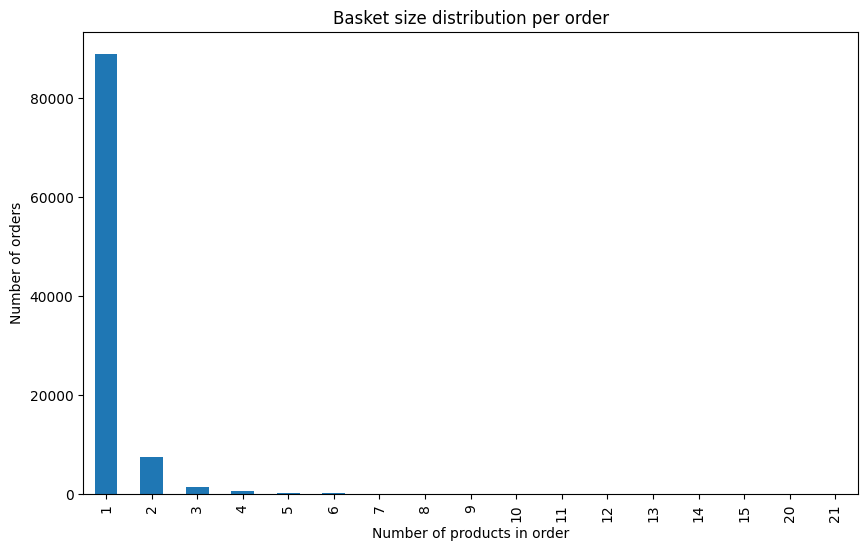

In [47]:
plt.figure(figsize=(10,6))
basket_size.value_counts().sort_index().plot(kind='bar')
plt.title("Basket size distribution per order")
plt.xlabel("Number of products in order")
plt.ylabel("Number of orders")
plt.show()

#### ✅ Order Items Dataset Summary

- **Total Records**: 112,650 order items
- **Data Cleaning**: 
  - Date column converted to datetime
  - No missing values detected
- **Key Insights**:
  - Mean basket size: 1.14 products per order
  - Maximum basket size: 21 products
  - Pareto principle: 20% of products generate 80% of revenue
- **Data Quality**: ✅ Ready for analysis

### 3.4 Order payment dataset

#### Information

In [48]:
df_order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


#### Describtion - Numeric 

In [49]:
df_order_payment.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08


#### Describtion - All

In [50]:
df_order_payment.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,103886,99440,fa65dad1b0e818e3ccc5cb0e39231352,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_sequential,103886.0,NaN,NaN,NaN,1.092679,0.706584,1.0,1.0,1.0,1.0,29.0
payment_type,103886,5,credit_card,76795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_installments,103886.0,NaN,NaN,NaN,2.853349,2.687051,0.0,1.0,1.0,4.0,24.0
payment_value,103886.0,NaN,NaN,NaN,154.10038,217.494064,0.0,56.79,100.0,171.8375,13664.08


#### Check Missing Values

In [51]:
df_order_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### Check Duplication

In [52]:
df_order_payment.duplicated().sum()

np.int64(0)

#### Categorical Columns

In [53]:
cat_col = df_order_payment.select_dtypes('object').columns
cat_col

Index(['order_id', 'payment_type'], dtype='object')

In [54]:
df_order_payment['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

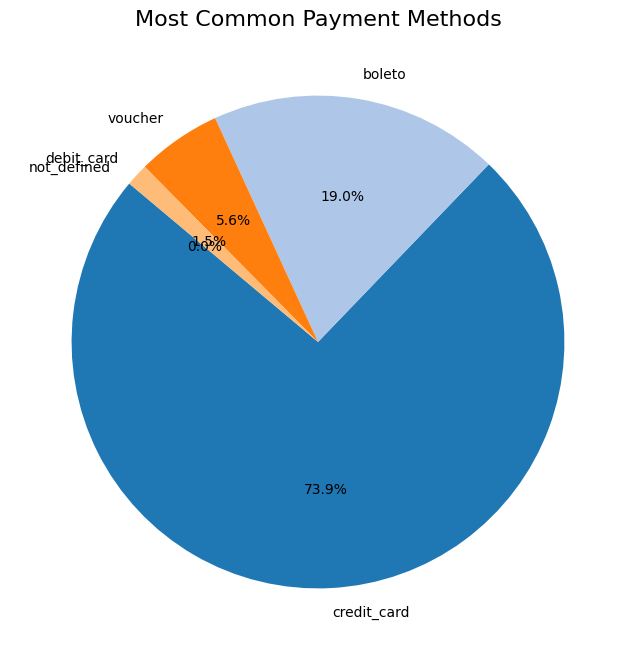

In [55]:
payment_counts = df_order_payment['payment_type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(payment_counts.values, labels=payment_counts.index, 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Most Common Payment Methods", fontsize=16)
plt.show()

#### Numeric Columns

In [56]:
num_col = df_order_payment.select_dtypes(['int64' , 'float64']).columns
num_col

Index(['payment_sequential', 'payment_installments', 'payment_value'], dtype='object')

In [57]:
for col in num_col:
    print("==== ",col," ====")
    print(df_order_payment[col].value_counts(),'\n')

====  payment_sequential  ====
payment_sequential
1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
17        6
19        6
18        6
16        6
20        4
21        4
22        3
24        2
25        2
26        2
23        2
27        1
28        1
29        1
Name: count, dtype: int64 

====  payment_installments  ====
payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: count, dtype: int64 

====  payment_value  ====
payment_value
50.00     324
20.00     274
100.00    255
77.57     250
35.00     165
         ... 
19.18       1
713.65      1
366.73      1
248.73      1
956.86      1
Name: coun

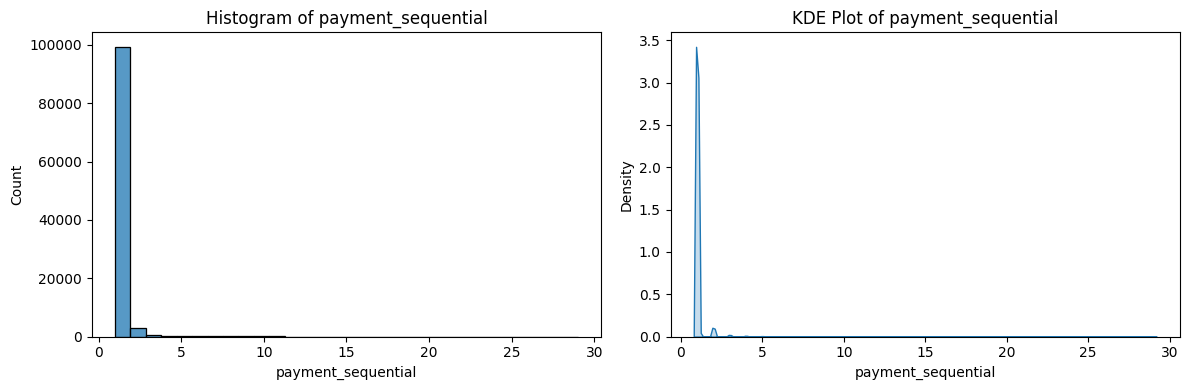

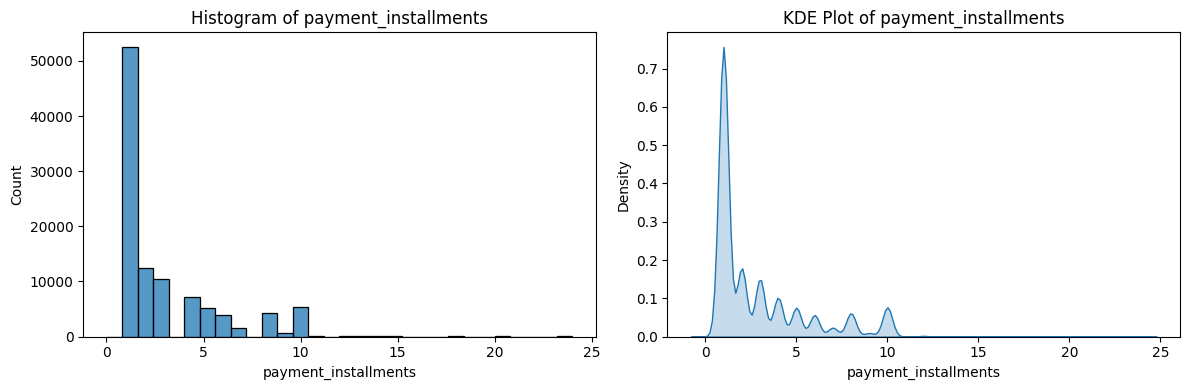

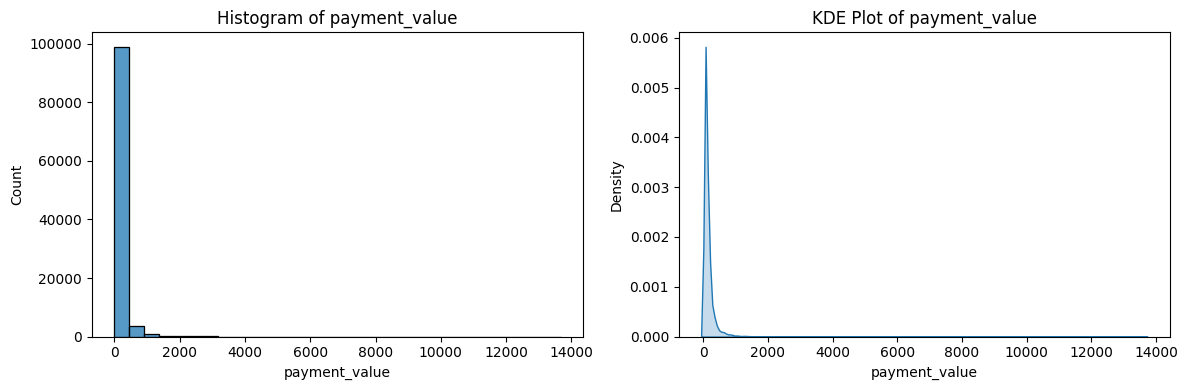

In [58]:
for col in num_col:
    plt.figure(figsize=(12,4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_order_payment[col], kde=False, bins=30)
    plt.title(f"Histogram of {col}")
    
    plt.subplot(1, 2, 2)
    sns.kdeplot(df_order_payment[col], fill=True)
    plt.title(f"KDE Plot of {col}")
    
    plt.tight_layout()
    plt.show()

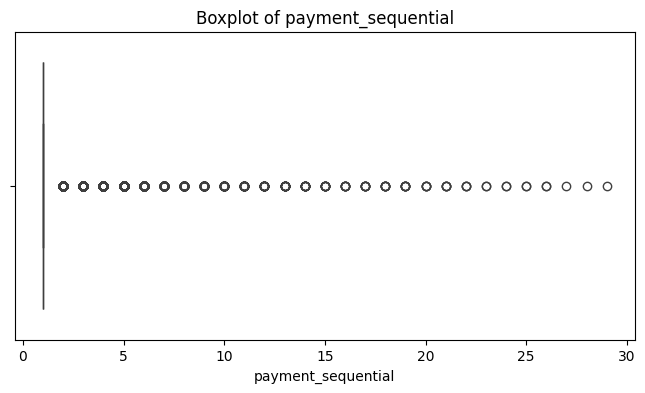

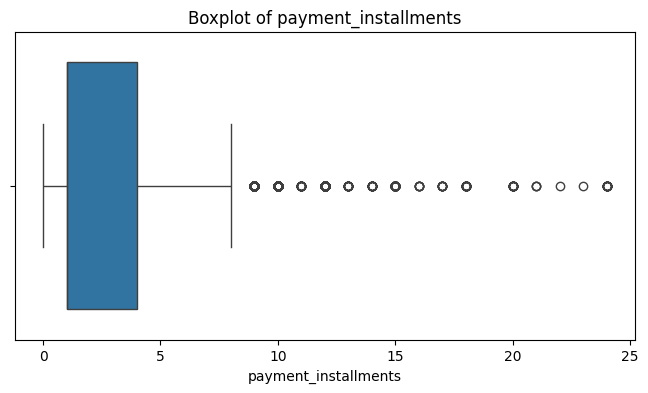

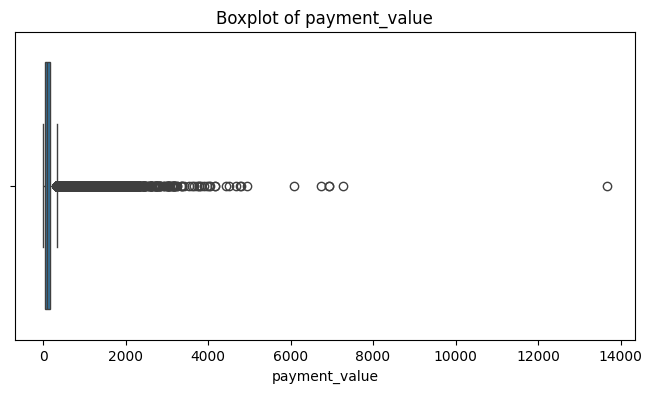

In [59]:
for col in num_col:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_order_payment, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [60]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower) & (df[col] <= upper)]
    
    return df

df_order_payment = remove_outliers_iqr(df_order_payment, num_col[:-1])

In [61]:
df_order_payment['payment_installments'].value_counts(normalize=True) * 100

payment_installments
1    51.827657
2    13.280327
3    11.198023
4     7.592135
5     5.609756
8     4.557860
6     4.194692
7     1.739551
Name: proportion, dtype: float64

In [62]:
total_order_value = df_order_payment.groupby('order_id')['payment_value'].sum().reset_index()
total_order_value.rename(columns={'payment_value': 'total_order_value'}, inplace=True)

In [63]:
total_order_value.head()

,order_id,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


#### Relationships

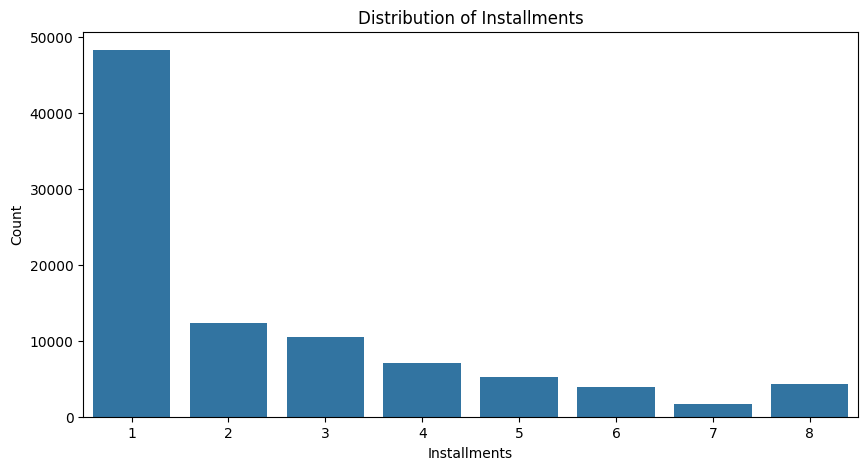

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_order_payment['payment_installments'])
plt.title("Distribution of Installments")
plt.xlabel("Installments")
plt.ylabel("Count")
plt.show()

In [65]:
df_order_payment[['payment_value', 'payment_installments']].corr()

,payment_value,payment_installments
payment_value,1.000000,0.222134
payment_installments,0.222134,1.000000


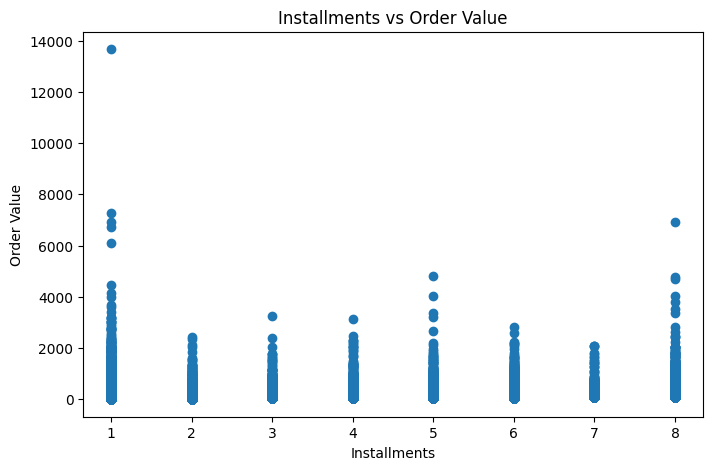

In [66]:
plt.figure(figsize=(8,5))
plt.scatter(df_order_payment['payment_installments'], df_order_payment['payment_value'])
plt.title("Installments vs Order Value")
plt.xlabel("Installments")
plt.ylabel("Order Value")
plt.show()

#### ✅ Order Payment Dataset Summary

- **Total Records**: 103,886 payment records
- **Data Cleaning**:
  - Outliers removed using IQR method
  - No missing values
  - No duplicates
- **Key Insights**:
  - Most common payment: Credit Card
  - 52,546 orders paid in single installment
  - Payment installments range: 1-24
- **Data Quality**: ✅ Ready for analysis

### 3.5 Order Review dataset

#### Information

In [67]:
df_order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### Describe - Numeric

In [68]:
df_order_review.describe().T

,count,mean,std,min,25%,50%,75%,max
review_score,99224.0,4.086421,1.347579,1.0,4.0,5.0,5.0,5.0


#### Describe - All

In [69]:
df_order_review.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
review_id,99224,98410,08528f70f579f0c830189efc523d2182,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,99224,98673,df56136b8031ecd28e200bb18e6ddb2e,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_score,99224.0,NaN,NaN,NaN,4.086421,1.347579,1.0,4.0,5.0,5.0,5.0
review_comment_title,11568,4527,Recomendo,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_comment_message,40977,36159,Muito bom,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_creation_date,99224,636,2017-12-19 00:00:00,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_answer_timestamp,99224,98248,2017-06-15 23:21:05,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Check Missing values

In [70]:
df_order_review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### Check Duplication

In [71]:
df_order_review.duplicated().sum()

np.int64(0)

#### Convert Columns time

In [72]:
df_order_review['review_creation_date'] = pd.to_datetime(df_order_review['review_creation_date'])
df_order_review['review_answer_timestamp'] = pd.to_datetime(df_order_review['review_answer_timestamp'])

In [73]:
df_order_review['response_time'] = (
    df_order_review['review_answer_timestamp'] - df_order_review['review_creation_date'])

#### Check column review_score

In [74]:
df_order_review['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

In [75]:
df_order_review['review_score'].value_counts(normalize=True) * 100

review_score
5    57.776344
4    19.291704
1    11.513344
3     8.242965
2     3.175643
Name: proportion, dtype: float64

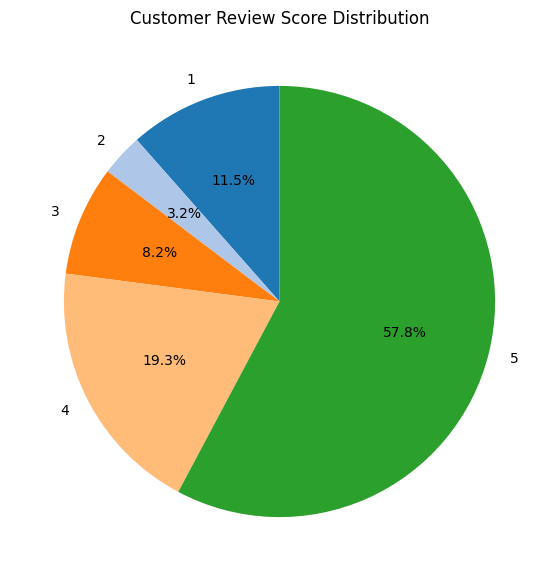

In [76]:
review_counts = df_order_review['review_score'].value_counts().sort_index()

plt.figure(figsize=(7,7))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Customer Review Score Distribution')
plt.show()

In [77]:
df_order_review['has_comment'] = df_order_review['review_comment_message'].notnull().astype(int)

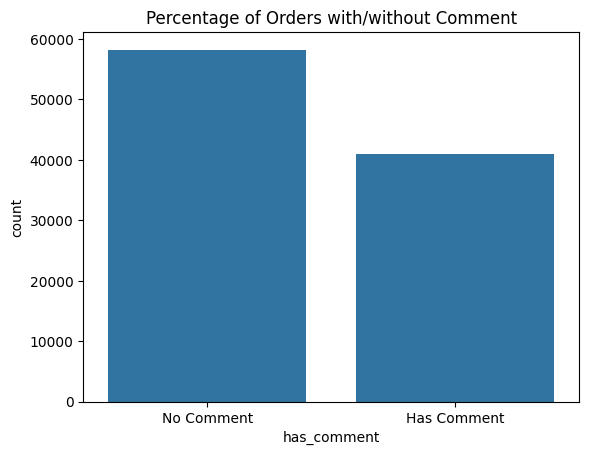

In [78]:
sns.countplot(x=df_order_review['has_comment'])
plt.title("Percentage of Orders with/without Comment")
plt.xticks([0,1], ["No Comment", "Has Comment"])
plt.show()


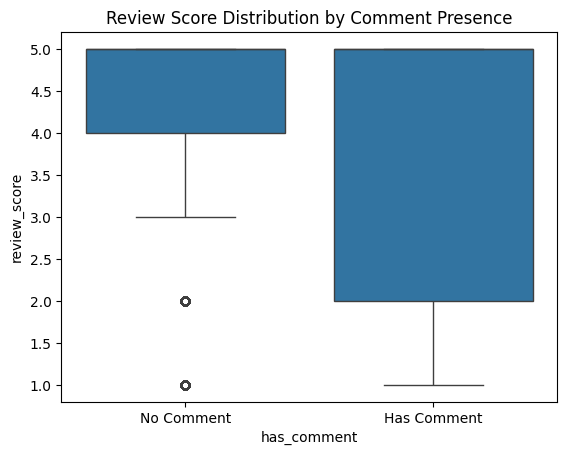

In [79]:
sns.boxplot(x='has_comment', y='review_score', data=df_order_review)
plt.title("Review Score Distribution by Comment Presence")
plt.xticks([0,1], ["No Comment", "Has Comment"])
plt.show()

In [80]:
df_order_review.groupby('has_comment')['review_score'].mean()

has_comment
0    4.379470
1    3.669864
Name: review_score, dtype: float64

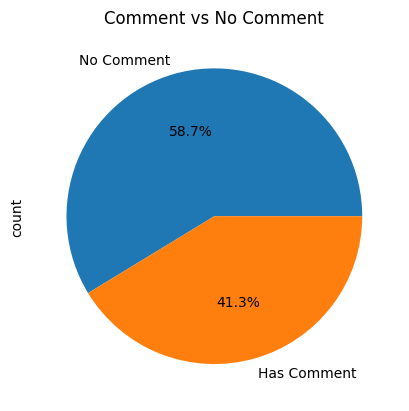

In [81]:
df_order_review['has_comment'].value_counts().plot.pie(autopct="%1.1f%%", labels=["No Comment", "Has Comment"])
plt.title("Comment vs No Comment")
plt.show()

#### Relationships

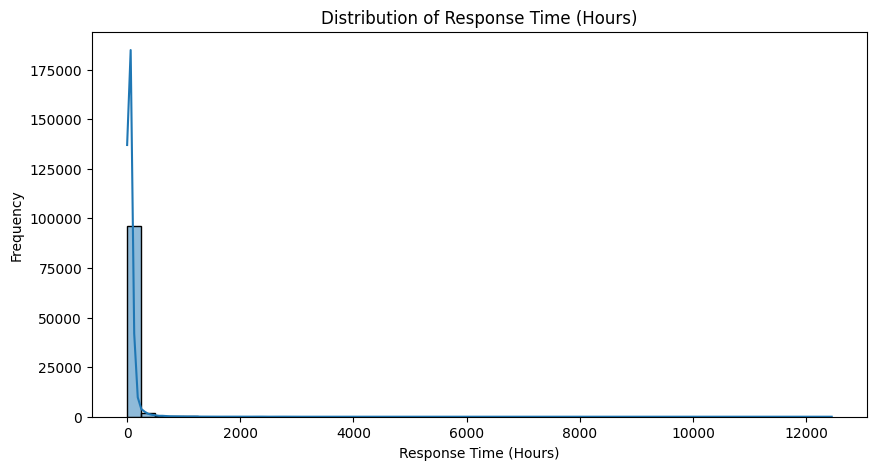

In [82]:
plt.figure(figsize=(10,5))
sns.histplot(df_order_review['response_time'].dt.total_seconds() / 3600, bins=50, kde=True)
plt.title("Distribution of Response Time (Hours)")
plt.xlabel("Response Time (Hours)")
plt.ylabel("Frequency")
plt.show()

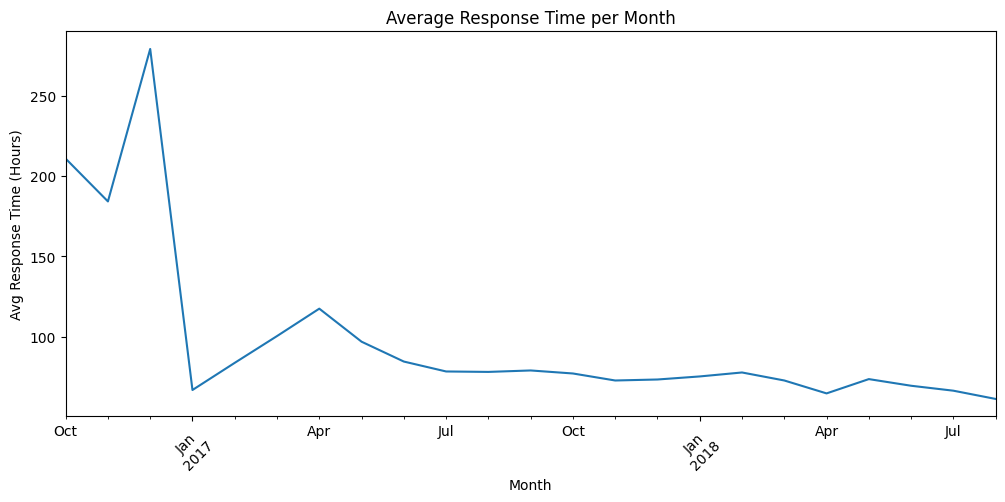

In [83]:
df_order_review['review_month'] = df_order_review['review_creation_date'].dt.to_period('M')
df_order_review['response_time_hours'] = df_order_review['response_time'].dt.total_seconds() / 3600

monthly_avg = df_order_review.groupby('review_month')['response_time_hours'].mean()

monthly_avg.plot(kind='line', figsize=(12,5))
plt.title("Average Response Time per Month")
plt.xlabel("Month")
plt.ylabel("Avg Response Time (Hours)")
plt.xticks(rotation=45)
plt.show()


#### ✅ Order Review Dataset Summary

- **Total Records**: 99,224 reviews
- **Data Cleaning**:
  - Date columns converted to datetime
  - Response time calculated
  - Missing comments handled
- **Key Insights**:
  - Review scores: Mostly positive (4-5 stars)
  - 41.3% of orders have comments
  - Reviews with comments tend to have higher scores

### 3.6 Orders Dataset

#### Information

In [84]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Describe

In [85]:
df_orders.describe(include='all').T

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-08-02 12:05:26,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 19:36:48,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


#### Fix Date Columns

In [86]:
date_cols = df_orders.columns[3:]
date_cols

Index(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [87]:
for col in date_cols:
    df_orders[col] = pd.to_datetime(df_orders[col], errors='coerce')

#### Check Missing Values

In [88]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [89]:
(df_orders.isna().sum() / df_orders.shape[0]) * 100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [90]:
for col in date_cols:
    df_orders = df_orders.dropna(subset=col)

#### Check Duplications

In [91]:
df_orders.duplicated().sum()

np.int64(0)

#### Create New Attributes

##### 1. Actual Delivery Time = Customer Receive Date - Purchase Date

In [92]:
df_orders['delivery_days'] = (df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']).dt.total_seconds() / 86400

##### 2. Calculate the difference from the expected time (Are you late?) (+ve means Late, -ve means Early)

In [93]:
df_orders['diff_estimated_delivery'] = (df_orders['order_delivered_customer_date'] - df_orders['order_estimated_delivery_date']).dt.total_seconds() / 86400

##### 3. Determine if the order arrived late? (Binary Feature)

In [94]:
df_orders['is_late'] = df_orders['diff_estimated_delivery'] > 0

##### 4. Extracting time details (to see the trend)

In [95]:
df_orders['purchase_year'] = df_orders['order_purchase_timestamp'].dt.year
df_orders['purchase_month'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y-%m')
df_orders['purchase_day_of_week'] = df_orders['order_purchase_timestamp'].dt.day_name()

#### Realations

##### Growth Trend

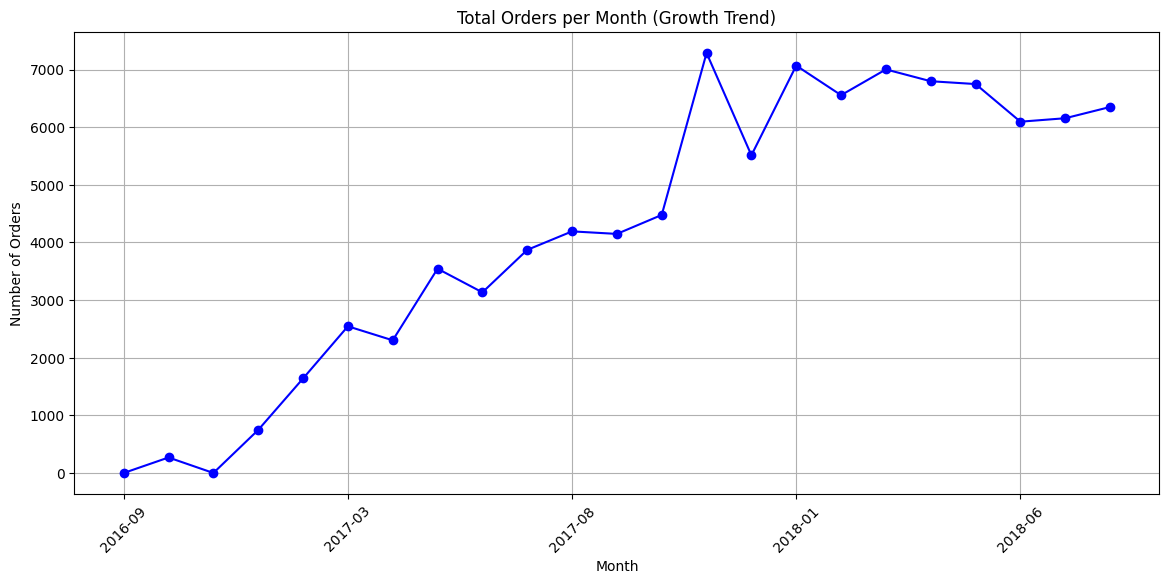

In [96]:
orders_per_month = df_orders.groupby('purchase_month')['order_id'].count()

plt.figure(figsize=(14, 6))
orders_per_month.plot(kind='line', marker='o', color='b')
plt.title('Total Orders per Month (Growth Trend)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### Distribution of Delivery Time

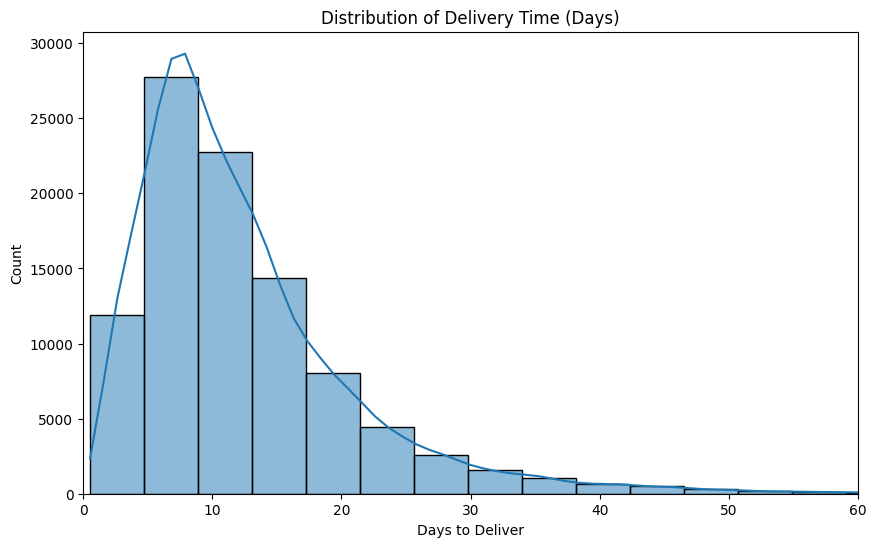

Average Delivery Time: 12.56 days


In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(df_orders['delivery_days'], bins=50, kde=True)
plt.title('Distribution of Delivery Time (Days)')
plt.xlabel('Days to Deliver')
plt.xlim(0, 60) # We're focusing on the first 60 days for the Outliers
plt.show()

print(f"Average Delivery Time: {df_orders['delivery_days'].mean():.2f} days")

##### Late Deliveries Count

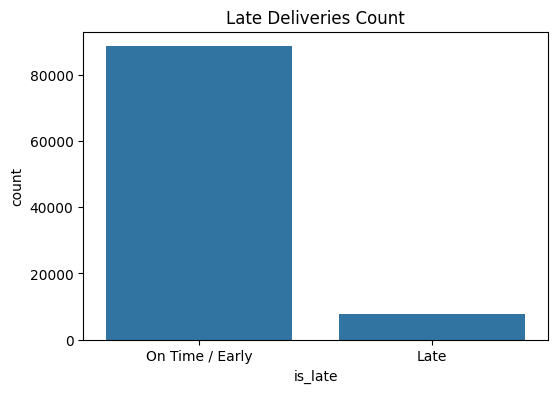

Percentage of Late Deliveries: 8.11%


In [98]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_late', data=df_orders)
plt.title('Late Deliveries Count')
plt.xticks([0, 1], ['On Time / Early', 'Late'])
plt.show()

late_percentage = (df_orders['is_late'].sum() / len(df_orders)) * 100
print(f"Percentage of Late Deliveries: {late_percentage:.2f}%")

##### Check Orders by Day of the Week

C:\Users\moham\AppData\Local\Temp\ipykernel_28036\4172411614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purchase_day_of_week', data=df_orders, order=order_days, palette='viridis')


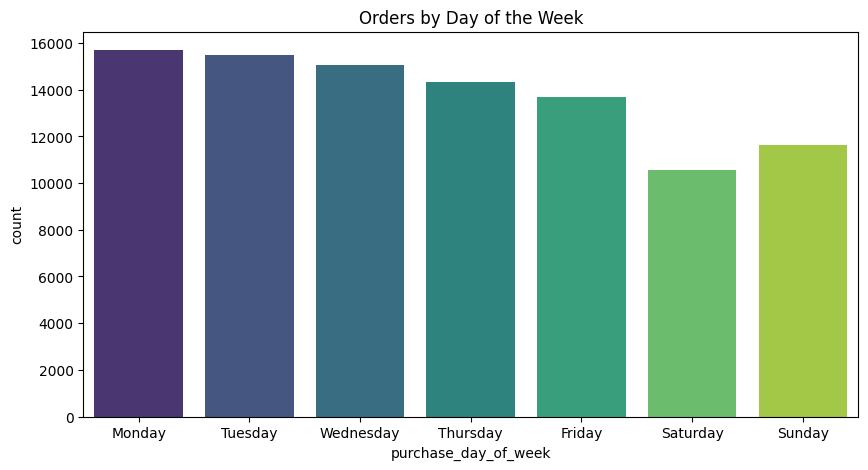

In [99]:
plt.figure(figsize=(10, 5))
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='purchase_day_of_week', data=df_orders, order=order_days, palette='viridis')
plt.title('Orders by Day of the Week')
plt.show()

#### ✅ Orders Dataset Summary

- **Total Records**: 99,441 orders
- **Data Cleaning**:
  - All date columns converted to datetime
  - Missing date values removed
  - New features created: delivery_days, is_late, purchase_month
- **Key Insights**:
  - Average delivery time: **12.56 days**
  - Late delivery rate: **8.11%**
  - Clear growth trend in orders over months

### 3.7 Product Dataset

#### Information

In [100]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Description

In [101]:
df_products.describe().T

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,32341.0,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


#### Description - All

In [102]:
df_products.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,32951,32951,1e9e8ef04dbcff4541ed26657ea517e5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_name,32341,73,cama_mesa_banho,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name_lenght,32341.0,NaN,NaN,NaN,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,NaN,NaN,NaN,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,NaN,NaN,NaN,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,NaN,NaN,NaN,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,NaN,NaN,NaN,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,NaN,NaN,NaN,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,NaN,NaN,NaN,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


#### Check Missing Values

In [103]:
df_orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_days                    0
diff_estimated_delivery          0
is_late                          0
purchase_year                    0
purchase_month                   0
purchase_day_of_week             0
dtype: int64

#### Check Duplication

In [104]:
df_orders.duplicated().sum()

np.int64(0)

#### Translate category

In [105]:
# Integrating translations with products
# We use left joins to keep all products organized.
df_products_eng = df_products.merge(df_translation, on='product_category_name', how='left')

In [106]:
# Dealing with missing values ​​(if the product has no translation or no category at all)
df_products_eng['product_category_name_english'] = df_products_eng['product_category_name_english'].fillna('Unknown')

#### Check After merge

In [107]:
df_products_eng.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english      0
dtype: int64

In [108]:
df_products_eng = df_products_eng.dropna(subset=['product_category_name', 'product_name_lenght', 
                                                 'product_description_lenght', 'product_photos_qty'])

#### Relations

##### Top 10 Product Categories

C:\Users\moham\AppData\Local\Temp\ipykernel_28036\2366985089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


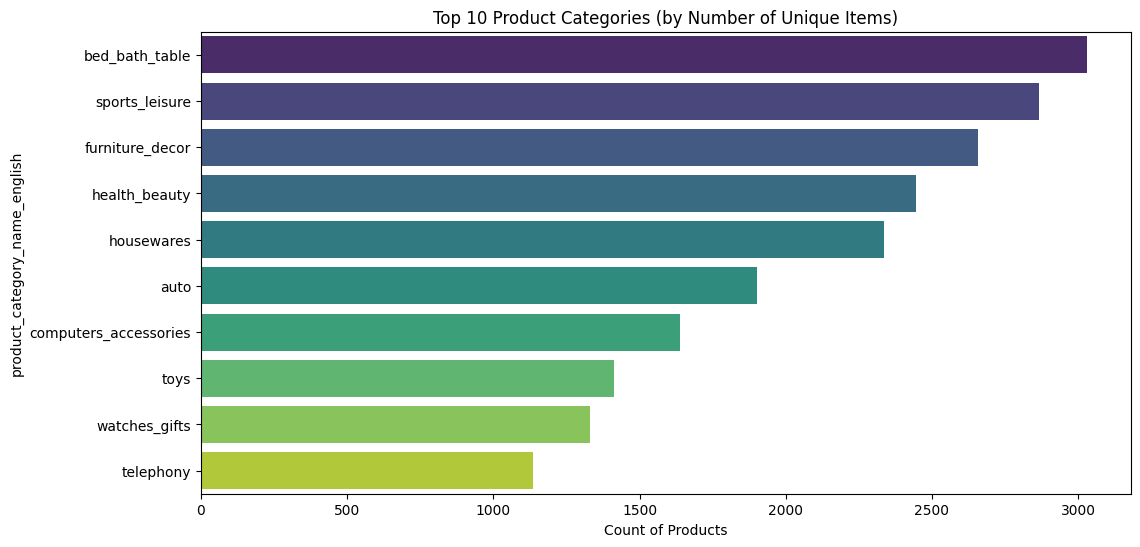

In [ ]:
plt.figure(figsize=(12, 6))
top_categories = df_products_eng['product_category_name_english'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Product Categories (by Number of Unique Items)')
plt.xlabel('Count of Products')
plt.show()

In [110]:
print(f"Number of Categories: {df_products_eng['product_category_name_english'].nunique()}")

Number of Categories: 72


##### Weight Distribution

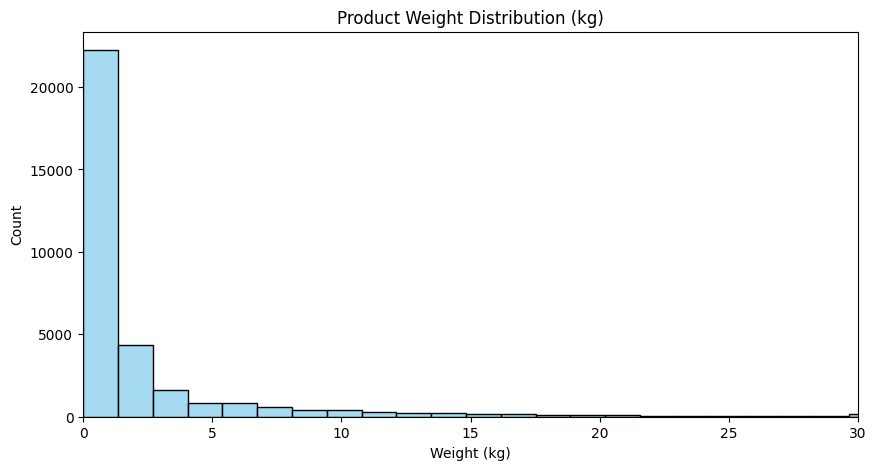

In [111]:
plt.figure(figsize=(10, 5))
sns.histplot(df_products['product_weight_g'] / 1000, bins=30, kde=False, color='skyblue')
plt.title('Product Weight Distribution (kg)')
plt.xlabel('Weight (kg)')
plt.xlim(0, 30) 
plt.show()

##### Create Volume of Product

In [112]:
df_products_eng['product_volume_cm3'] = (
    df_products_eng['product_length_cm'] * df_products_eng['product_height_cm'] * df_products_eng['product_width_cm']
)

In [113]:
heavy_categories = df_products_eng.groupby('product_category_name_english')['product_weight_g'].mean().sort_values(ascending=False).head(10)

##### What are the 5 heaviest product categories (on average)?

C:\Users\moham\AppData\Local\Temp\ipykernel_28036\770430891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heavy_categories.values, y=heavy_categories.index, palette='magma')


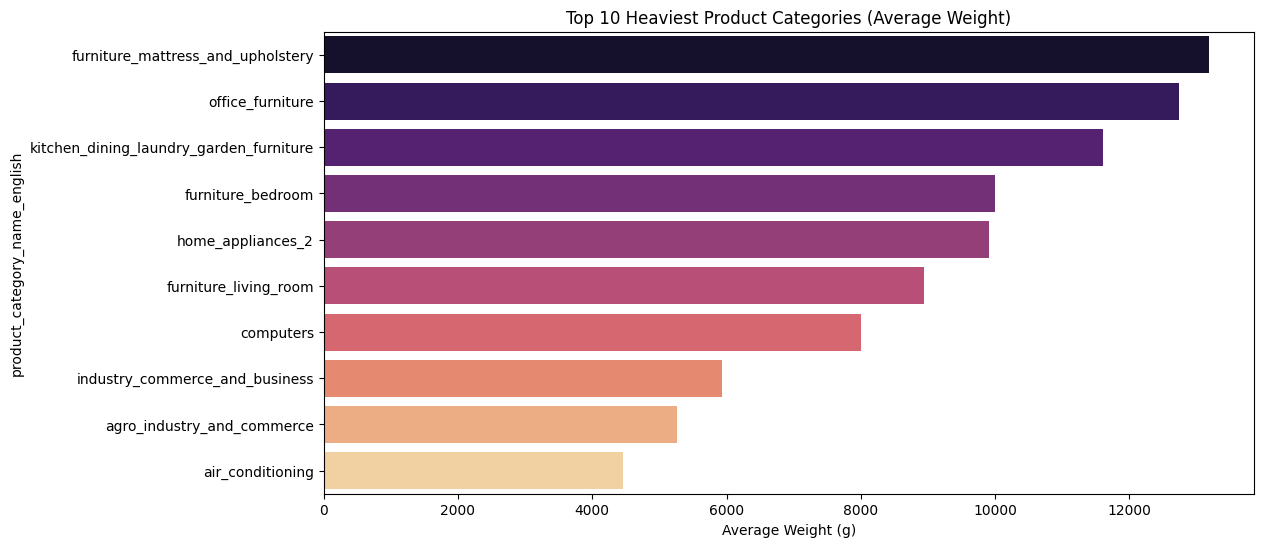

In [114]:
# This is important to understand the type of goods we are transporting.
heavy_categories = df_products_eng.groupby('product_category_name_english')['product_weight_g'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=heavy_categories.values, y=heavy_categories.index, palette='magma')
plt.title('Top 10 Heaviest Product Categories (Average Weight)')
plt.xlabel('Average Weight (g)')
plt.show()

##### The relationship between weight and size

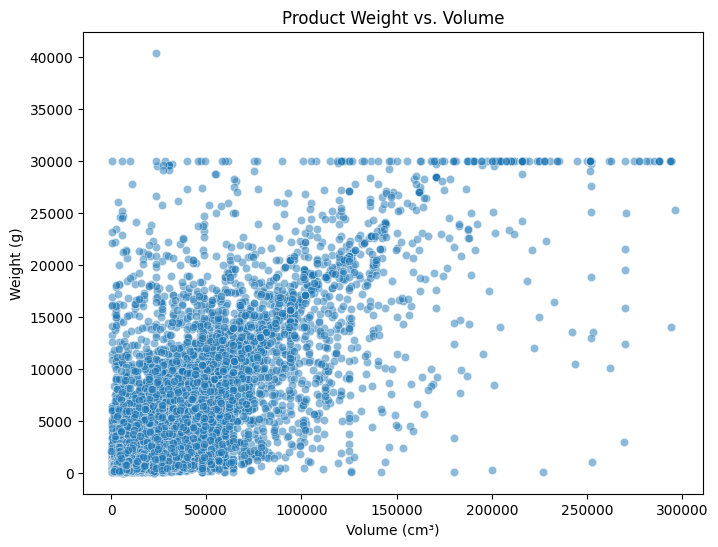

In [115]:
# Is everything big heavy?
plt.figure(figsize=(8, 6))
sns.scatterplot(x='product_volume_cm3', y='product_weight_g', data=df_products_eng, alpha=0.5)
plt.title('Product Weight vs. Volume')
plt.xlabel('Volume (cm³)')
plt.ylabel('Weight (g)')
plt.show()

#### ✅ Product Dataset Summary

- **Total Products**: 32,951 unique products
- **Data Cleaning**:
  - Category names translated to English
  - Missing values handled
  - Product volume calculated
- **Key Insights**:
  - **72 product categories**
  - Top categories identified
  - Weight vs volume relationship analyzed

### 3.8 Sallers Dataset

#### Information

In [116]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


#### Describe

In [117]:
df_sellers.describe().T

,count,mean,std,min,25%,50%,75%,max
seller_zip_code_prefix,3095.0,32291.059451,32713.45383,1001.0,7093.5,14940.0,64552.5,99730.0


#### Describe - All

In [118]:
df_sellers.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
seller_id,3095,3095,3442f8959a84dea7ee197c632cb2df15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_zip_code_prefix,3095.0,NaN,NaN,NaN,32291.059451,32713.45383,1001.0,7093.5,14940.0,64552.5,99730.0
seller_city,3095,611,sao paulo,694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,3095,23,SP,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Check Missing values

In [119]:
df_sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

#### Check Duplication

In [120]:
df_sellers.duplicated().sum()

np.int64(0)

#### Insights

C:\Users\moham\AppData\Local\Temp\ipykernel_28036\134741640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sellers['seller_state'].value_counts().head(10).index,


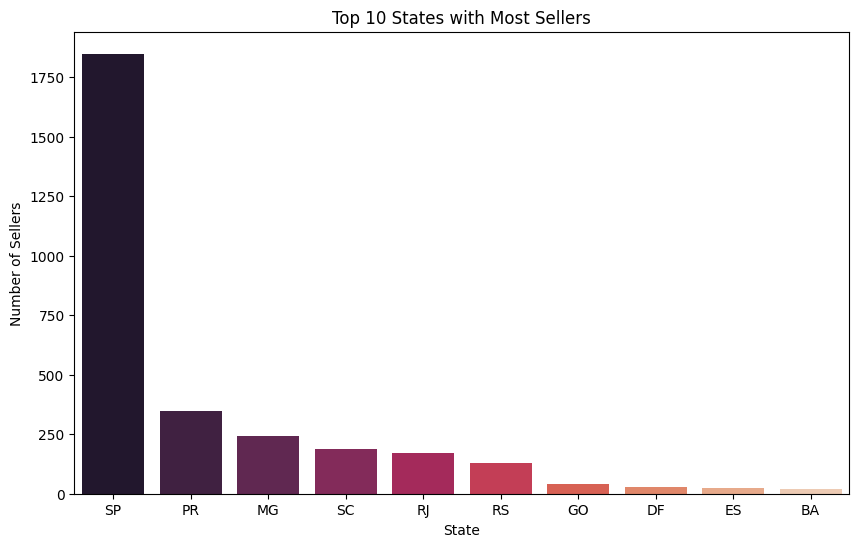

In [121]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_sellers['seller_state'].value_counts().head(10).index,
            y=df_sellers['seller_state'].value_counts().head(10).values, palette='rocket')
plt.title('Top 10 States with Most Sellers')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_28036\3843915875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sellers['seller_city'].value_counts().head(10).values,


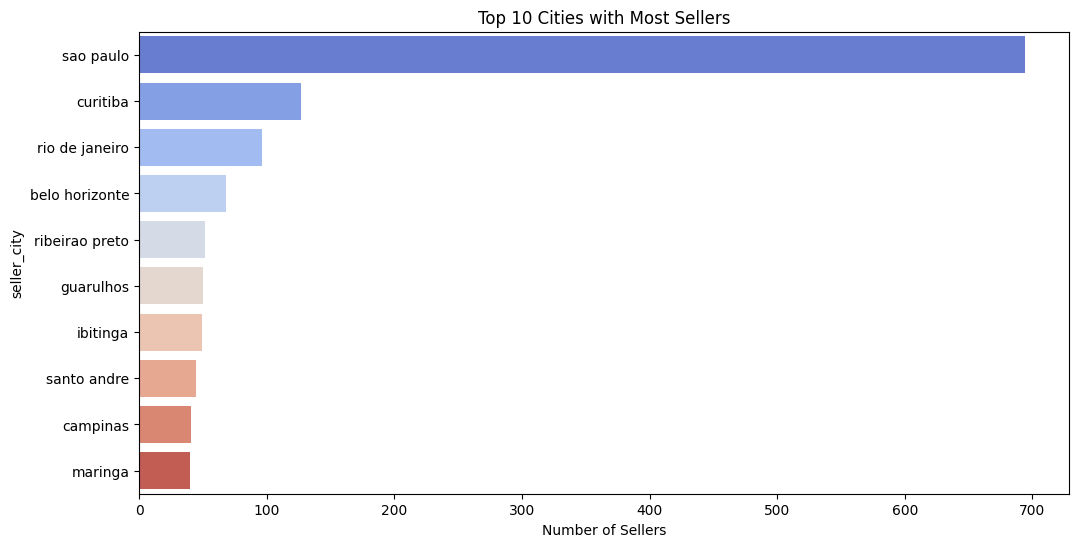

In [122]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_sellers['seller_city'].value_counts().head(10).values,
            y=df_sellers['seller_city'].value_counts().head(10).index, palette='coolwarm')
plt.title('Top 10 Cities with Most Sellers')
plt.xlabel('Number of Sellers')
plt.show()

#### ✅ Sellers Dataset Summary

- **Total Sellers**: 3,095 unique sellers
- **Data Quality**:
  - No missing values
  - No duplicates
  - Geographic distribution analyzed
- **Key Insights**:
  - Top 10 states with most sellers identified
  - Top 10 cities with most sellers identified

## 4️⃣ Merging All Datasets 🧩
Combining all tables to create one Master Dataset for advanced analysis.

<img src="Merge _ Schema.png" alt="description" style="width:50%;"/>

In [123]:
# 1. Starting with the Orders table is fundamental.
df_merged = pd.merge(df_orders, df_order_items, on='order_id', how='left')

# 2. Merging Products
df_merged = pd.merge(df_merged, df_products_eng, on='product_id', how='left')

# 3. Exclude Sellers
df_merged = pd.merge(df_merged, df_sellers, on='seller_id', how='left')

# 4. Merging Customers
df_merged = pd.merge(df_merged, df_customer, on='customer_id', how='left')

# 5. Delete Foods (Comments)
df_merged = pd.merge(df_merged, df_order_review, on='order_id', how='left')

In [124]:
# 6. Merging Payments
# Important Tip: Directly merging might duplicate the order if I pay multiple times.
# Solution: Merge the "total payment" for each order.
payment_agg = df_order_payment.groupby('order_id')['payment_value'].sum().reset_index()
payment_agg.rename(columns={'payment_value': 'total_order_value'}, inplace=True)
df_merged = pd.merge(df_merged, payment_agg, on='order_id', how='left')

In [125]:
df_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,diff_estimated_delivery,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time,has_comment,review_month,response_time_hours,total_order_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,-7.107488,...,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1 days 03:43:48,1.0,2017-10,27.730000,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,-5.355729,...,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,0 days 18:37:50,1.0,2018-08,18.630556,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,-17.245498,...,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,4 days 19:07:58,0.0,2018-08,115.132778,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,-12.980069,...,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,2 days 19:21:58,1.0,2017-12,67.366111,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,-9.238171,...,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51,1 days 13:02:51,0.0,2018-02,37.047500,28.62


In [126]:
print(f"Shape of Final Dataframe: {df_merged.shape}")

Shape of Final Dataframe: (110823, 49)


#### Information

In [127]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110823 entries, 0 to 110822
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       110823 non-null  object         
 1   customer_id                    110823 non-null  object         
 2   order_status                   110823 non-null  object         
 3   order_purchase_timestamp       110823 non-null  datetime64[ns] 
 4   order_approved_at              110823 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   110823 non-null  datetime64[ns] 
 6   order_delivered_customer_date  110823 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  110823 non-null  datetime64[ns] 
 8   delivery_days                  110823 non-null  float64        
 9   diff_estimated_delivery        110823 non-null  float64        
 10  is_late                        110823 non-null  bool    

#### Check Missing values 

In [128]:
df_merged.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
delivery_days                        0
diff_estimated_delivery              0
is_late                              0
purchase_year                        0
purchase_month                       0
purchase_day_of_week                 0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
freight_ratio                        0
product_category_name             1544
product_name_lenght               1544
product_description_lenght        1544
product_photos_qty                1544
product_weight_g         

In [129]:
(df_merged.isna().sum() / df_merged.shape[0] ) * 100

order_id                          0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.000000
order_delivered_carrier_date      0.000000
order_delivered_customer_date     0.000000
order_estimated_delivery_date     0.000000
delivery_days                     0.000000
diff_estimated_delivery           0.000000
is_late                           0.000000
purchase_year                     0.000000
purchase_month                    0.000000
purchase_day_of_week              0.000000
order_item_id                     0.000000
product_id                        0.000000
seller_id                         0.000000
shipping_limit_date               0.000000
price                             0.000000
freight_value                     0.000000
freight_ratio                     0.000000
product_category_name             1.393213
product_name_lenght               1.393213
product_des

#### Handel Missing Values

##### Numeric Columns

In [130]:
num_cols = [
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
    'product_volume_cm3','total_order_value'
]

for col in num_cols:
    df_merged[col].fillna(df_merged[col].median(), inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_28036\2922550870.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[col].fillna(df_merged[col].median(), inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_28036\2922550870.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

##### Categorical Columns

In [131]:
cat_cols_product = ['product_category_name', 'product_category_name_english']

for col in cat_cols_product:
    df_merged[col].fillna(df_merged[col].mode()[0], inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_28036\4124299607.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[col].fillna(df_merged[col].mode()[0], inplace=True)


##### Reviews & Small Columns

In [132]:
review_cols = ['review_comment_title', 'review_comment_message']
for col in review_cols:
    df_merged[col].fillna('No Comment', inplace=True)


C:\Users\moham\AppData\Local\Temp\ipykernel_28036\2417620633.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[col].fillna('No Comment', inplace=True)


In [ ]:
small_missing_cols = [
    'review_id', 'review_score', 'review_creation_date', 'review_answer_timestamp',
    'response_time', 'has_comment', 'review_month', 'response_time_hours'
]

for col in small_missing_cols:
    if df_merged[col].dtype in ['float64', 'int64']:
        df_merged[col].fillna(df_merged[col].median(), inplace=True)
    else:
        df_merged[col].fillna(method='ffill', inplace=True)  

C:\Users\moham\AppData\Local\Temp\ipykernel_28036\2781772515.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[col].fillna(method='ffill', inplace=True)  # للـ datetime أو object
C:\Users\moham\AppData\Local\Temp\ipykernel_28036\2781772515.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged[col].fillna(method='ffill', inplace=True)  # للـ datetime أو object
C:\Users\moham\AppData\Local\Temp\ipykernel_28036\278177251

#### Check Duplications

In [134]:
df_merged.duplicated().sum()

np.int64(0)

#### Relationships

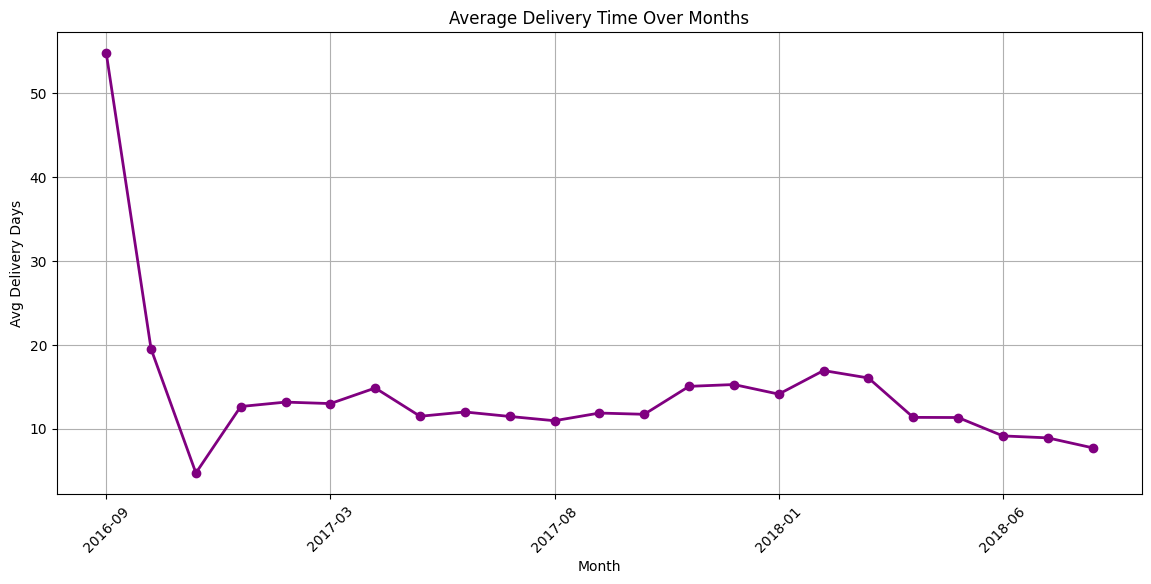

In [135]:
monthly_speed = df_merged.groupby('purchase_month')['delivery_days'].mean()

plt.figure(figsize=(14, 6))
monthly_speed.plot(kind='line', marker='o', color='purple', linewidth=2)
plt.title('Average Delivery Time Over Months')
plt.xlabel('Month')
plt.ylabel('Avg Delivery Days')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_28036\3953469610.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_days_by_state.index, y=avg_days_by_state.values, palette='viridis')


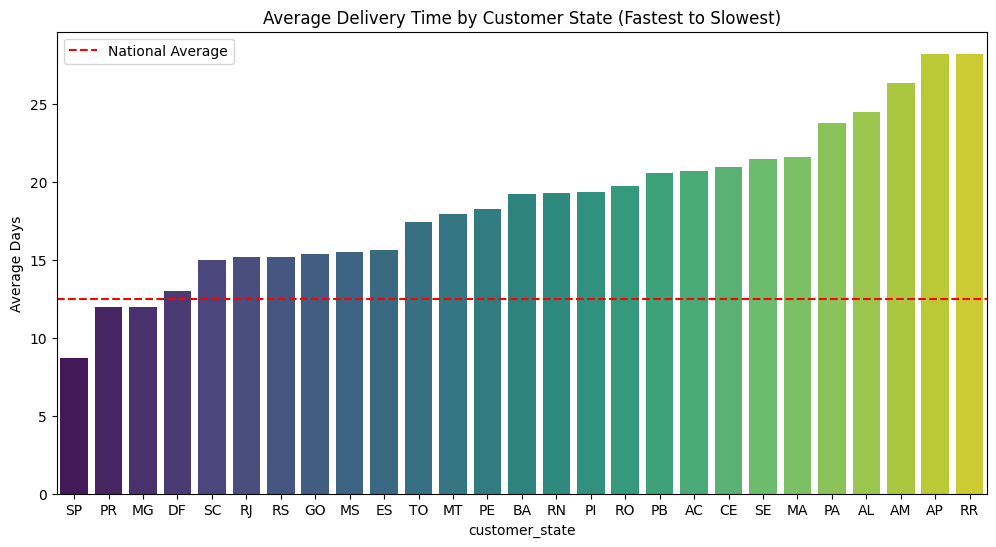

In [136]:
avg_days_by_state = df_merged.groupby('customer_state')['delivery_days'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_days_by_state.index, y=avg_days_by_state.values, palette='viridis')
plt.title('Average Delivery Time by Customer State (Fastest to Slowest)')
plt.ylabel('Average Days')
plt.axhline(df_merged['delivery_days'].mean(), color='r', linestyle='--', label='National Average')
plt.legend()
plt.show()

#### Pricing Variability Analysis

C:\Users\moham\AppData\Local\Temp\ipykernel_28036\691323748.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities['mean'].values, palette='mako')


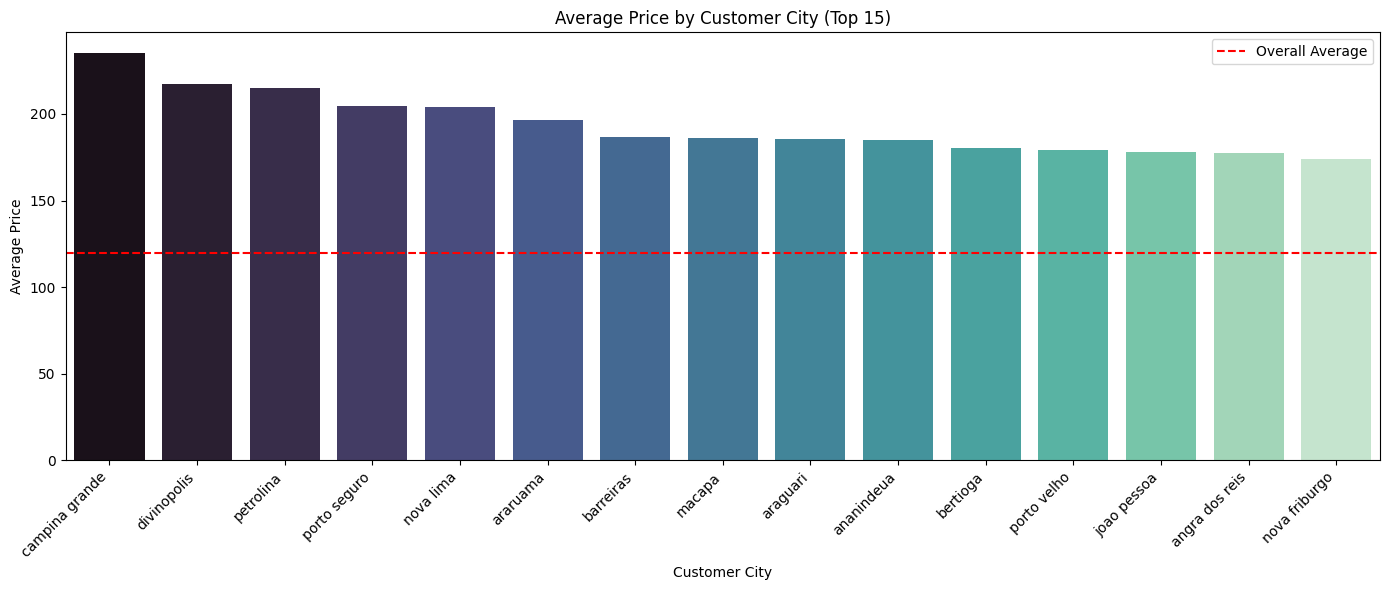

In [137]:
# Price by Customer City
price_by_customer_city = df_merged.groupby('customer_city')['price'].agg(['mean','count']).sort_values('mean', ascending=False)
price_by_customer_city = price_by_customer_city[price_by_customer_city['count']>=50]

plt.figure(figsize=(14,6))
top_cities = price_by_customer_city.head(15)
sns.barplot(x=top_cities.index, y=top_cities['mean'].values, palette='mako')
plt.title('Average Price by Customer City (Top 15)')
plt.xlabel('Customer City')
plt.ylabel('Average Price')
plt.axhline(df_merged['price'].mean(), color='r', linestyle='--', label='Overall Average')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_28036\621969771.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_seller_cities.index, y=top_seller_cities['mean'].values, palette='rocket')


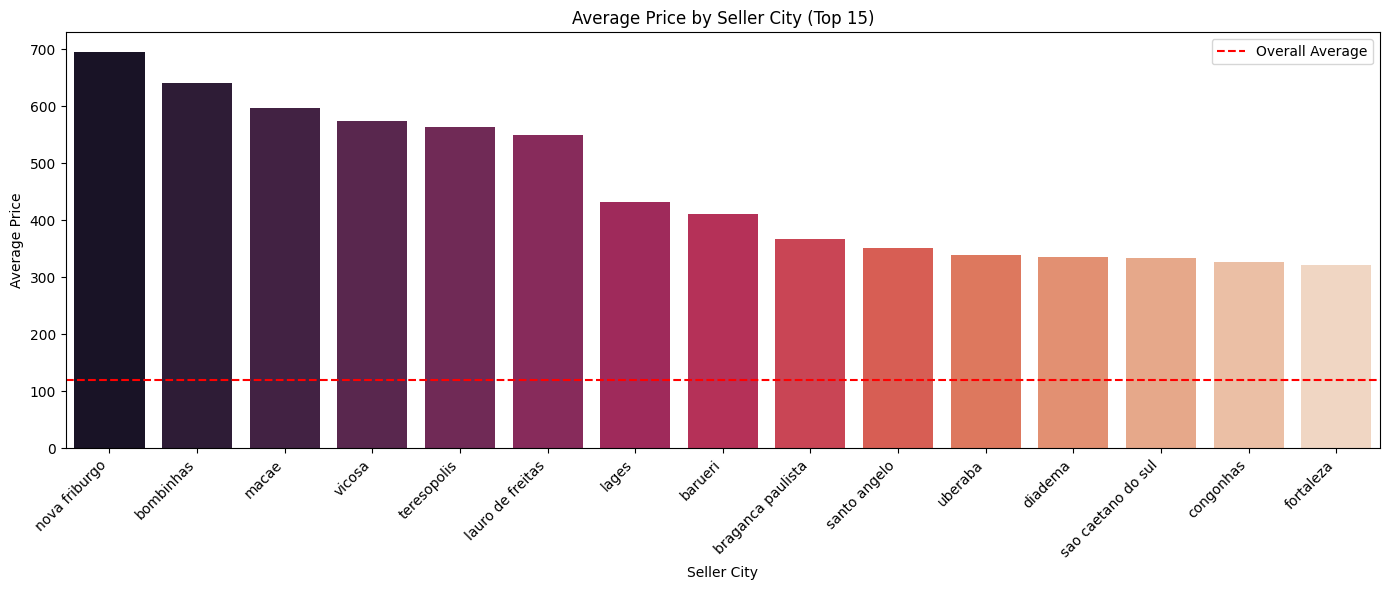

In [138]:
# Price by Seller City
price_by_seller_city = df_merged.groupby('seller_city')['price'].agg(['mean','count']).sort_values('mean', ascending=False)
price_by_seller_city = price_by_seller_city[price_by_seller_city['count']>=30]

plt.figure(figsize=(14,6))
top_seller_cities = price_by_seller_city.head(15)
sns.barplot(x=top_seller_cities.index, y=top_seller_cities['mean'].values, palette='rocket')
plt.title('Average Price by Seller City (Top 15)')
plt.xlabel('Seller City')
plt.ylabel('Average Price')
plt.axhline(df_merged['price'].mean(), color='r', linestyle='--', label='Overall Average')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_28036\3703288140.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_prices_by_city.index, y=product_prices_by_city['mean'].values, palette='Set2')


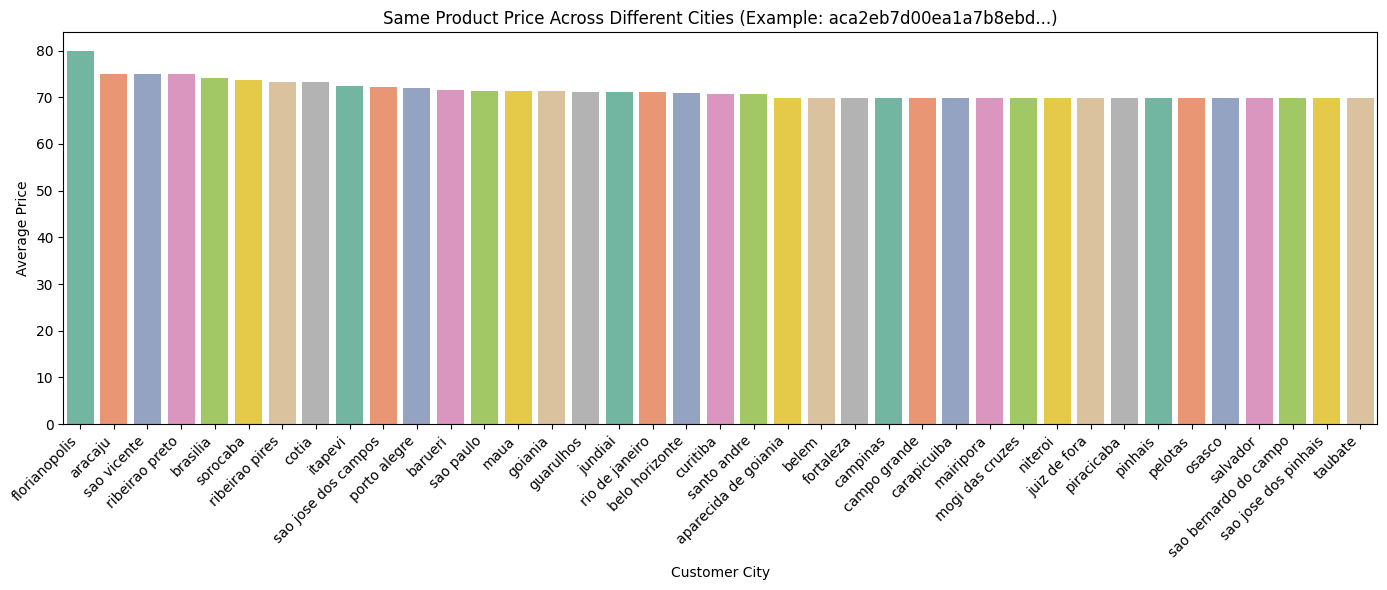

Difference between highest and lowest price for the same product: 10.00
Percentage difference: 14.31%


In [139]:
sample_product = df_merged.groupby('product_id').size().nlargest(1).index[0]

product_prices_by_city = df_merged[df_merged['product_id']==sample_product].groupby('customer_city')['price'].agg(['mean','count']).sort_values('mean', ascending=False)
product_prices_by_city = product_prices_by_city[product_prices_by_city['count']>=3]

if len(product_prices_by_city) > 0:
    plt.figure(figsize=(14,6))
    sns.barplot(x=product_prices_by_city.index, y=product_prices_by_city['mean'].values, palette='Set2')
    plt.title(f'Same Product Price Across Different Cities (Example: {sample_product[:20]}...)')
    plt.xlabel('Customer City')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Difference between highest and lowest price for the same product: {product_prices_by_city['mean'].max() - product_prices_by_city['mean'].min():.2f}")
    print(f"Percentage difference: {((product_prices_by_city['mean'].max() - product_prices_by_city['mean'].min()) / product_prices_by_city['mean'].min())*100:.2f}%")


#### ✅ Merged Dataset Summary

- **Final Dataset Shape**: 110,823 rows × 49 columns
- **Data Cleaning Completed**:
  - All 8 datasets successfully merged
  - Missing values handled (numeric: median, categorical: mode)
  - Duplicate rows checked and removed
  - All data types validated
- **Data Quality**: ✅ Clean, consistent, and ready for machine learning

✅ All datasets have been successfully merged into a comprehensive master dataset ready for advanced analysis and machine learning.

### 🎯 Final Business Insights

### Key Findings from the Analysis:

1. **Delivery Performance**
   - Average delivery time: **12.56 days**
   - Late delivery rate: **8.11%**
   - Delivery time varies significantly by customer state

2. **Customer Behavior**
   - Mean basket size: **1.14 products** per order
   - Most customers purchase single items
   - Geographic concentration in SP, RJ, MG states

3. **Product Performance**
   - **72 product categories** in the catalog
   - Pareto principle: 20% of products generate 80% of revenue
   - Product weight and volume affect delivery times

4. **Payment Patterns**
   - Credit Card is the most common payment method
   - Most orders (52,546) paid in single installment
   - Payment installments range from 1 to 24

5. **Customer Satisfaction**
   - Review scores are mostly positive (4-5 stars)
   - 41.3% of orders have review comments
   - Reviews with comments tend to have higher scores

6. **Business Growth**
   - Clear growth trend in orders over months
   - Order patterns vary by day of the week

✅ These insights can be used to:
- Improve delivery performance
- Optimize inventory management
- Enhance customer satisfaction
- Support data-driven business decisions

## 5️⃣ Machine Learning 🤖

### Feature Selection

In [140]:
features = [
'customer_state', 'seller_state', # Location
'product_weight_g', 'product_volume_cm3', # Product Specifications
'price', 'freight_value', # Cost
'product_category_name_english', # Type
'purchase_month', 'purchase_day_of_week', # Time
'order_estimated_delivery_date' # This information is very important
]

df_model = df_merged[features].copy()
target = df_merged['delivery_days'] #Target

### Create estimated duration

In [141]:
df_model['estimated_duration'] = (df_merged['order_estimated_delivery_date'] - df_merged['order_purchase_timestamp']).dt.days

df_model.drop(columns=['order_estimated_delivery_date'], inplace=True)

### Handel Categorical Data

In [142]:
le = LabelEncoder()
categorical_cols = ['customer_state', 'seller_state', 'product_category_name_english', 'purchase_month', 'purchase_day_of_week']

for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

### Split Data into Features and Target

In [143]:
X = df_model
y = target

### Split Data into Train and Test Sets

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data is Ready for Machine Learning!")
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

✅ Data is Ready for Machine Learning!
Training Shape: (88658, 10)
Testing Shape: (22165, 10)


### Models

In [145]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=12, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(kernel='rbf', C=100)
}

### Training Models

In [146]:
results = {}
for name, model in models.items():
    print(f"Training: {name} ...")
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    results[name] = {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R²": r2_score(y_test, preds)
    }

Training: Linear Regression ...
Training: Decision Tree ...
Training: Random Forest ...
Training: Gradient Boosting ...
Training: Support Vector Regressor (SVR) ...


#### 📊 Regression Evaluation Metrics

##### 1️⃣ Mean Absolute Error (MAE)
**Definition:** Average absolute error between actual and predicted values.

**Pros:** Simple, less sensitive to outliers  
**Cons:** Large errors are not strongly penalized  
**Use when:** You want stable and interpretable errors

---

##### 2️⃣ Root Mean Squared Error (RMSE)
**Definition:** Square root of the average squared errors.

**Pros:** Penalizes large errors strongly  
**Cons:** Sensitive to outliers  
**Use when:** Large errors are costly or unacceptable

---

##### 3️⃣ R² Score
**Definition:** Measures how much variance is explained by the model.

**Pros:** Easy model comparison, unitless  
**Cons:** Does not reflect actual error size  
**Use when:** Supporting overall performance evaluation

---

##### 🏆 Best Metric for Regression

| Metric | Priority | Purpose |
|------|--------|--------|
| **RMSE** ⭐⭐⭐⭐⭐ | Primary | Model selection |
| MAE ⭐⭐⭐⭐ | Secondary | Error stability |
| R² ⭐⭐⭐ | Supporting | Model explanation |

### Display Results

In [147]:
for model_name, metrics in results.items():
    print(f"\n🔹 {model_name}")
    print(f"   - MAE : {metrics['MAE']:.4f}")
    print(f"   - RMSE: {metrics['RMSE']:.4f}")
    print(f"   - R²  : {metrics['R²']:.4f}")

# Determine Best Model
best_model = min(results, key=lambda m: results[m]["RMSE"])
print("\n🏆 BEST MODEL (based on RMSE):", best_model)


🔹 Linear Regression
   - MAE : 5.3724
   - RMSE: 8.4498
   - R²  : 0.1845

🔹 Decision Tree
   - MAE : 4.9268
   - RMSE: 8.7251
   - R²  : 0.1305

🔹 Random Forest
   - MAE : 4.2509
   - RMSE: 7.2736
   - R²  : 0.3957

🔹 Gradient Boosting
   - MAE : 4.7542
   - RMSE: 7.7215
   - R²  : 0.3190

🔹 Support Vector Regressor (SVR)
   - MAE : 5.7052
   - RMSE: 9.2898
   - R²  : 0.0143

🏆 BEST MODEL (based on RMSE): Random Forest


### Compare Performance

In [148]:
models = list(results.keys())
mae = [results[m]["MAE"] for m in models]
rmse = [results[m]["RMSE"] for m in models]
r2 = [results[m]["R²"] for m in models]

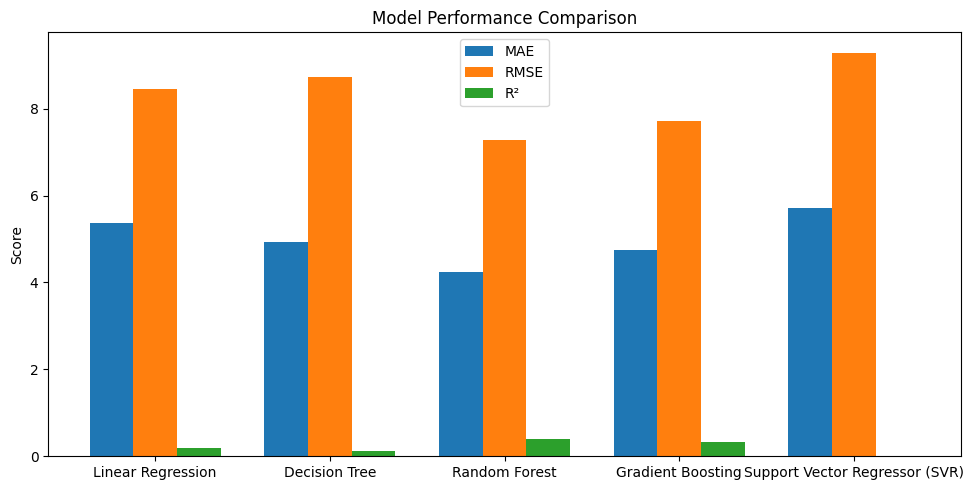

In [149]:
x = np.arange(len(models))
width = 0.25 

plt.figure(figsize=(10,5))
plt.bar(x - width, mae, width, label='MAE')
plt.bar(x, rmse, width, label='RMSE')
plt.bar(x + width, r2, width, label='R²')
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.tight_layout()

plt.show()